# Часть 3. Выбор и обучение модели

In [2]:
import pandas as pd
import numpy as np
import pickle                                                        #для сохранения модели
from sklearn.model_selection import train_test_split                 #для разбиения данных на выборки
from sklearn import metrics                                          #метрики
from sklearn.linear_model import LinearRegression                    #линейная регрессия
from sklearn.ensemble import RandomForestRegressor                   #случайный лес
from sklearn.ensemble import GradientBoostingRegressor               #градиентный бустинг
# визуальная составляющая
import matplotlib.pyplot as plt
%matplotlib inline

Проверим разные алгоритмы и сравним их показатели. Кроме того, посмотрим показатели на разных датасетах: полном и сокращенном

In [3]:
#зафиксируем параметры
RANDOM_SEED = 34
TEST_SIZE=0.2

#загружаем датасеты для обучения
data = pd.read_csv('data4ml.csv') #все колонки, которые получились в п.1. Далее - Полный датасет
data_2 = pd.read_csv('data4ml_2.csv') #датасет с удаленными колонками после feature-selector. Далее - сокращенный датасет

In [26]:
data_2.columns

Index(['5', 'stories_count', '9', 'Remodeled', 'beds_square', '12', '7', 'PK',
       '6', 'Year', 'Cooling', 'prop_type', 'schools_count', 'state_encoding',
       '8', 'price_sqft', 'min_dist', 'address_hash', 'pool', 'baths_count',
       'max_rate', 'street_hash', 'sqft', 'max_dist', 'beds_count', 'K',
       'city_hash', 'mean_dist', 'Parking', 'new_id', 'price',
       'average_rate_school', 'zipcode_int', 'price_lot', 'lot', 'state_mean',
       'target'],
      dtype='object')

In [8]:
data.head(10)

,sqft,target,rent_sale,prop_type,city_hash,street_hash,address_hash,baths_count,beds_count,beds_square,...,Cooling,Heating,Parking,price,Remodeled,Year,lot,new_id,price_sqft,price_lot
0,2900,418000,0,16,572,1186,1169,3.5,4,0.0,...,0,1,0,144,0,2019,0.0,481584,417600,0.0
1,1947,310000,0,16,802,1361,826,3.0,3,0.0,...,0,0,0,159,0,2019,5828.0,326029,309573,926652.0
2,3000,2895000,0,16,1279,1456,849,2.0,3,0.0,...,1,1,1,965,1967,1961,8626.0,21263,2895000,8324090.0
3,6457,2395000,0,16,1654,805,1170,8.0,5,0.0,...,1,1,1,371,2006,2006,8220.0,215392,2395547,3049620.0
4,0,5000,0,44,275,2011,794,0.0,0,0.0,...,0,0,0,0,0,0,10019.0,198067,0,0.0
5,897,209000,0,24,795,493,546,0.0,2,0.0,...,1,1,0,233,0,1920,680.0,354215,209001,158440.0
6,1507,181500,0,11,103,1018,1405,0.0,0,0.0,...,1,1,0,120,2006,2006,4996.0,364646,180840,599520.0
7,0,68000,0,16,1658,218,197,0.0,0,0.0,...,0,0,0,57,0,1976,8750.0,273159,0,498750.0
8,3588,244900,0,16,426,1087,1603,2.0,3,0.0,...,1,1,0,68,0,1970,124582.0,312350,243984,8471576.0
9,1930,311995,0,16,1770,465,58,3.0,3,0.0,...,1,1,1,162,0,2019,2056.0,172029,312660,333072.0


In [4]:
#разделяем датасеты на данные и целевую переменную
columns = list(set(data.columns) - set(['target']))
X = data[columns]
y = data['target']


columns_2 = list(set(data_2.columns) - set(['target']))
X_2 = data_2[columns_2]
y_2 = data_2['target']

## Линейная регрессия

Полный датасет

In [61]:
#разделяем датасет на тренировочную и валидационные части
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=TEST_SIZE, random_state = RANDOM_SEED)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred_lin =  lin_reg.predict(X_test)
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика Mean Absolute Error (MAE) показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))
print('R2-score', metrics.r2_score(y_test, y_pred_lin))

#как видим, в среднем ошибка очень большая, что совсем нас не устраивает

MAE: 206229.37218126425
RMSE: 912220.233238284
R2-score 0.7627165236491584


Сокращенный датасет

In [62]:
#разделяем датасет на тренировочную и валидационные части
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2, test_size=TEST_SIZE, random_state = RANDOM_SEED)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred_lin =  lin_reg.predict(X_test)
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика Mean Absolute Error (MAE) показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))
print('R2-score', metrics.r2_score(y_test, y_pred_lin))


#как видим, в среднем ошибка очень большая, что совсем нас не устраивает

MAE: 215493.34197042376
RMSE: 917318.9031180727
R2-score 0.7600566151761968


## Случайный лес

Полный датасет

In [5]:
#разделяем датасет на тренировочную и валидационные части
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=TEST_SIZE, random_state = RANDOM_SEED)

model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score', metrics.r2_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s


MAE: 76196.43932214462
RMSE: 756456.6060836108
R2-score 0.8368315700359621


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished


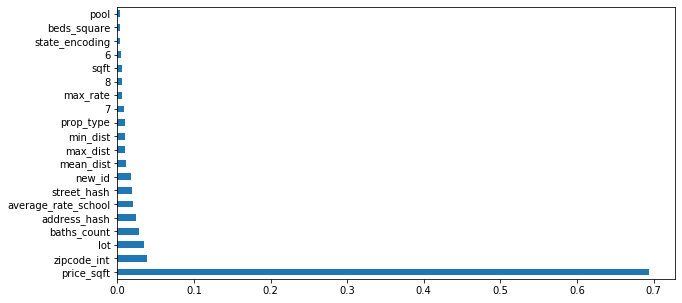

In [6]:
#посмотрим, какие колонки вносят больший вклад
plt.rcParams['figure.figsize'] = (10,5)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

Сокращенный датасет

In [7]:
#разделяем датасет на тренировочную и валидационные части
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2, test_size=TEST_SIZE, random_state = RANDOM_SEED)

model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score', metrics.r2_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s


MAE: 76466.83414345613
RMSE: 751087.6835537534
R2-score 0.8391395142773859


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished


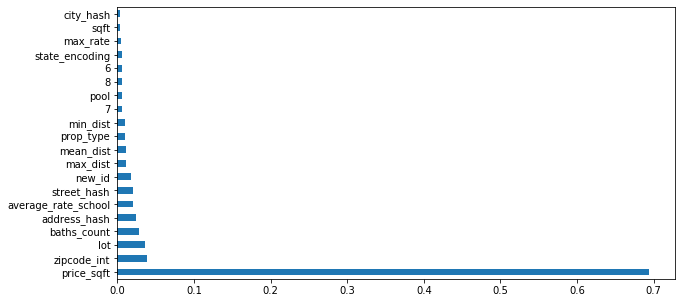

In [9]:
#посмотрим, какие колонки вносят больший вклад
plt.rcParams['figure.figsize'] = (10,5)
feat_importances = pd.Series(model.feature_importances_, index=X_2.columns)
feat_importances.nlargest(20).plot(kind='barh')

## gradient boosting

Проведем процедуру подбора наилучших гиперпараметров перед непосредственно обучением модели

In [33]:
from sklearn.model_selection import GridSearchCV
#подбор гиперпараметров
parameters = {'n_estimators':[30, 50,100], 'learning_rate':[0.1], 'max_depth': [15,20],
             'min_samples_leaf': [2], 'random_state': [RANDOM_SEED]}

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=TEST_SIZE, random_state = RANDOM_SEED)
gbrt_search = GradientBoostingRegressor()
search = GridSearchCV(gbrt_search, parameters, verbose =1)
search.fit(X_train,y_train)
best_param = search.best_estimator_
best_param


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 252.2min finished


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=15,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=34, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Полный датасет

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=TEST_SIZE, random_state = RANDOM_SEED)
gbrt = GradientBoostingRegressor(max_depth=15, n_estimators=100, 
                                 min_samples_leaf = 2, learning_rate=0.1,random_state = RANDOM_SEED,
                                 verbose =0)
gbrt.fit(X_train,y_train)
y_pred = gbrt.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score', metrics.r2_score(y_test, y_pred))

MAE: 81984.49011767308
RMSE: 746143.8085367202
R2-score 0.8412502046600739


Сокращенный датасет

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_2,y_2, test_size=TEST_SIZE, random_state = RANDOM_SEED)

gbrt_2 = GradientBoostingRegressor(max_depth=15, n_estimators=100, 
                                 min_samples_leaf = 2, learning_rate=0.1,random_state = RANDOM_SEED,
                                 verbose =0)
gbrt_2.fit(X_train,y_train)
y_pred_2 = gbrt_2.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))
print('R2-score', metrics.r2_score(y_test, y_pred_2))

ValueError: Number of features of the model must match the input. Model n_features is 46 and input n_features is 36 

In [15]:
y_pred_2 = gbrt_2.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))
print('R2-score', metrics.r2_score(y_test, y_pred_2))

MAE: 82344.98813989568
RMSE: 742028.4353542759
R2-score 0.8429965515628661


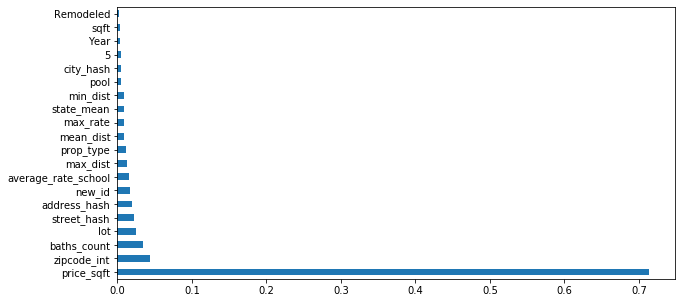

In [16]:
#посмотрим, какие колонки вносят больший вклад
plt.rcParams['figure.figsize'] = (10,5)
feat_importances = pd.Series(gbrt_2.feature_importances_, index=X_2.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Вывод
Наилучший результат дает алгоритм Градиентного бустинга на сокращенном датасете. Его и будем использовать для прототипа

In [28]:
model = pickle.dumps(gbrt_2)
with open('model.pkl', 'wb') as f:
    pickle.dump(gbrt_2, f)

# Voting

In [35]:
from sklearn.ensemble import VotingRegressor

X_train, X_test, y_train, y_test = train_test_split(X_2,y_2, test_size=TEST_SIZE, random_state = RANDOM_SEED)

reg1 = GradientBoostingRegressor(max_depth=15, n_estimators=100, 
                                 min_samples_leaf = 2, learning_rate=0.1,random_state = RANDOM_SEED,
                                 verbose =0)
reg2 = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)

y_pred = ereg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score', metrics.r2_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s


MAE: 103573.50763276432
RMSE: 750516.1878318249
R2-score 0.8393842156795602


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished


In [30]:
X_2.columns

Index(['new_id', 'Remodeled', 'mean_dist', '9', 'schools_count', 'min_dist',
       'prop_type', '7', 'beds_square', 'Parking', 'sqft', 'zipcode_int', '6',
       '5', 'Cooling', 'beds_count', 'pool', 'lot', 'state_encoding',
       'baths_count', 'K', 'average_rate_school', 'city_hash', 'max_dist',
       'street_hash', 'price_sqft', 'stories_count', 'Year', 'PK', 'price_lot',
       '12', 'max_rate', 'address_hash', 'price', 'state_mean', '8'],
      dtype='object')